## Importations des librairies courantes

In [1]:
# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

## Lecture du fichier

Input features in order:
1. CRIM: per capita crime rate by town
1. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
1. INDUS: proportion of non-retail business acres per town
1. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
1. NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
1. RM: average number of rooms per dwelling
1. AGE: proportion of owner-occupied units built prior to 1940
1. DIS: weighted distances to five Boston employment centres
1. RAD: index of accessibility to radial highways
1. TAX: full-value property-tax rate per $10,000 [$/10k]
1. PTRATIO: pupil-teacher ratio by town
1. B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
1. LSTAT: % lower status of the population

Output variable:
1. MEDV: Median value of owner-occupied homes in $1000's [k$]


In [2]:
# Lecture du dataset
df = pd.read_csv("../input/the-boston-houseprice-data/boston.csv")

In [3]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905,0.02985,0.08829,0.14455,0.21124,0.17004
ZN,18.00000,0.00000,0.00000,0.00000,0.00000,0.00000,12.50000,12.50000,12.50000,12.50000
INDUS,2.31000,7.07000,7.07000,2.18000,2.18000,2.18000,7.87000,7.87000,7.87000,7.87000
CHAS,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
NOX,0.53800,0.46900,0.46900,0.45800,0.45800,0.45800,0.52400,0.52400,0.52400,0.52400
RM,6.57500,6.42100,7.18500,6.99800,7.14700,6.43000,6.01200,6.17200,5.63100,6.00400
AGE,65.20000,78.90000,61.10000,45.80000,54.20000,58.70000,66.60000,96.10000,100.00000,85.90000
DIS,4.09000,4.96710,4.96710,6.06220,6.06220,6.06220,5.56050,5.95050,6.08210,6.59210
RAD,1.00000,2.00000,2.00000,3.00000,3.00000,3.00000,5.00000,5.00000,5.00000,5.00000
TAX,296.00000,242.00000,242.00000,222.00000,222.00000,222.00000,311.00000,311.00000,311.00000,311.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
MEDV       506
dtype: int64

In [6]:
tabcorr = df.corr()

<AxesSubplot:>

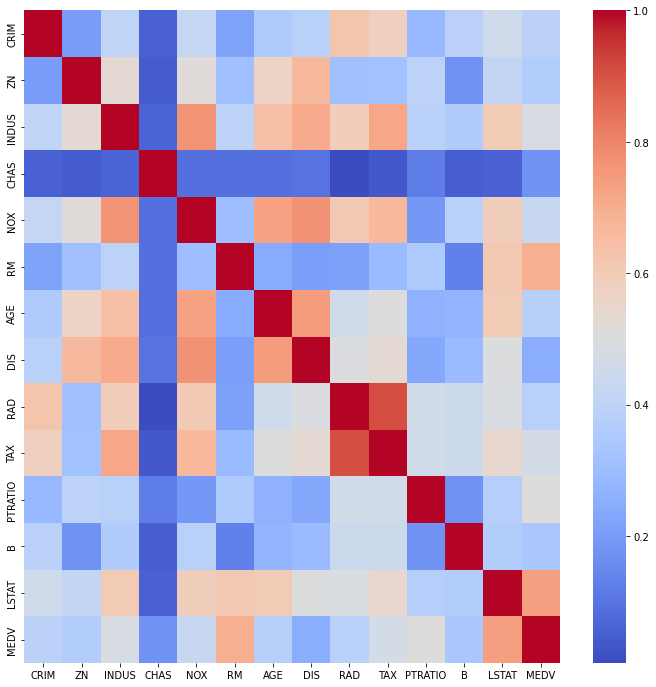

In [7]:
# Heatmap des corrélations
plt.figure(figsize=(12,12))
sns.heatmap(abs(tabcorr), cmap="coolwarm")

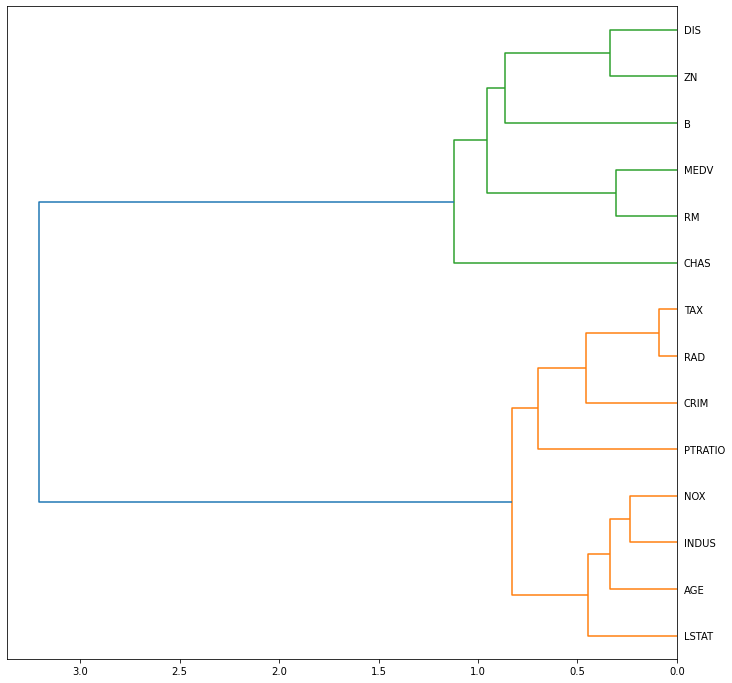

In [8]:
# dendrogrammes des corrélations
from scipy.cluster import hierarchy as hc

corr = 1 - df.corr()
corr_condensed = hc.distance.squareform(corr)
link = hc.linkage(corr_condensed, method='ward')
plt.figure(figsize=(12,12))
den = hc.dendrogram(link, labels=df.columns, orientation='left', leaf_font_size=10)

In [9]:
# Corrélation avec MEDV trié par ordre décroissant
price_corr = tabcorr.MEDV.drop(['MEDV'], axis=0)
print(abs(price_corr).sort_values(ascending=False))

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64


## Application de la régression linéaire

In [10]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [11]:
# Séparation des caractéristiques (discrètes et continues)
continuous_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
discrete_features = ['CHAS']

# Suppression des caractéristiques discrètes et de la colone à deviner
X = df.drop(discrete_features, axis= 1).drop(['MEDV'], axis=1)
y = df.MEDV
# Split des échantillons de test et d'entrainement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

In [12]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)            # apprentissage
y_pred = lm.predict(X_test)         # prédiction sur l'ensemble de test

Text(0.5, 1.0, 'Valeur médiane reels vs predictions')

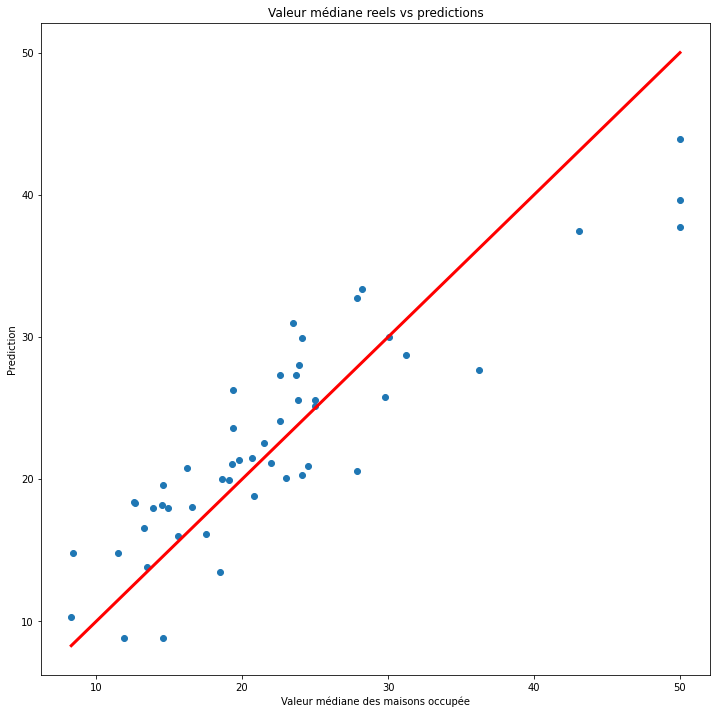

In [13]:
# Comme pour le TD sur Seatle, on trace le nuage de points qui permet de comparer la prédiction et les résultats attendus
plt.figure(figsize=(12,12))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel("Valeur médiane des maisons occupée")
plt.ylabel("Prediction")
plt.title("Valeur médiane reels vs predictions")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

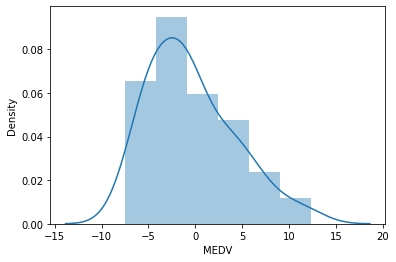

In [14]:
# On peut aussi regarder la distribution de l'erreur
sns.distplot(y_test-y_pred)

In [15]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

4.59924394991654


In [16]:
scoreR2 = r2_score(y_test, y_pred)
print(scoreR2)

0.7720792539106345


## Application de la régression par forêts aléatoires

On utilisera ici les mêmes échantillons afin d'avoir des comparaisons cohérentes

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

Text(0.5, 1.0, 'Valeur médiane reels vs predictions')

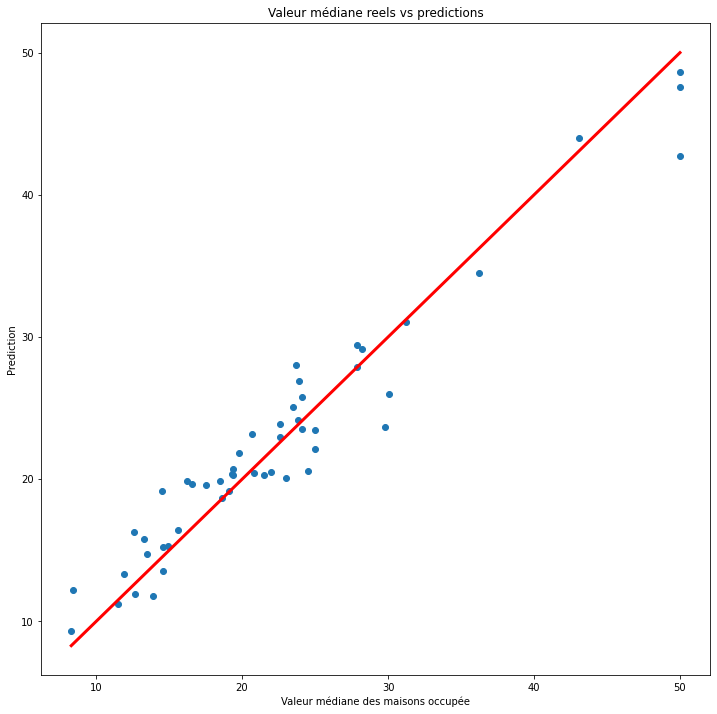

In [18]:
plt.figure(figsize=(12,12))
plt.scatter(y_test, y_rf)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel("Valeur médiane des maisons occupée")
plt.ylabel("Prediction")
plt.title("Valeur médiane reels vs predictions")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

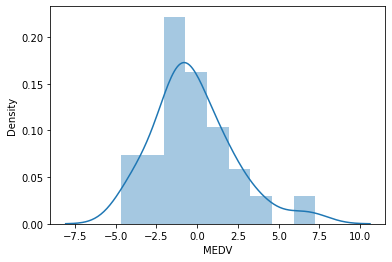

In [19]:
sns.distplot(y_test-y_rf)

In [20]:
print(np.sqrt(mean_squared_error(y_test, y_rf)))

2.4509957240304763


In [21]:
rf.score(X_test,y_test)

0.9352714209064772

Affichage des critères les plus importants trié dans l'ordre décroissant

In [22]:
feature_importances = []
for i in range(len(rf.feature_importances_)):
    feature_importances.append((X_test.columns[i], rf.feature_importances_[i]))

# Print the features sorted by its importance (reverse natural order)
for feature in sorted(feature_importances, key=lambda tup: tup[1], reverse=True):
    print(feature)
    

('LSTAT', 0.45349729918186393)
('RM', 0.34162606333327283)
('DIS', 0.07108087337892394)
('CRIM', 0.036345453572063556)
('NOX', 0.0217773126197324)
('PTRATIO', 0.01929039698415292)
('AGE', 0.014410653402651444)
('TAX', 0.014045939516723437)
('B', 0.013120919603059129)
('INDUS', 0.008559571147510896)
('RAD', 0.005003504319370803)
('ZN', 0.0012420129406746352)


In [23]:
import xgboost as XGB
xgb  = XGB.XGBRegressor()
xgb.fit(X_train, y_train)
y_xgb = xgb.predict(X_test)

Text(0.5, 1.0, 'Valeur médiane reels vs predictions')

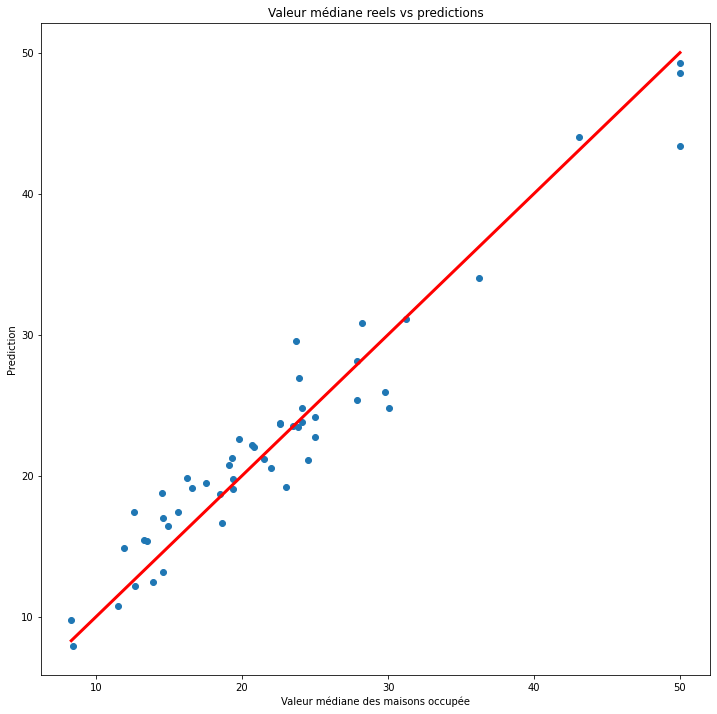

In [24]:
plt.figure(figsize=(12,12))
plt.scatter(y_test, y_xgb)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], color='red', linewidth=3)
plt.xlabel("Valeur médiane des maisons occupée")
plt.ylabel("Prediction")
plt.title("Valeur médiane reels vs predictions")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

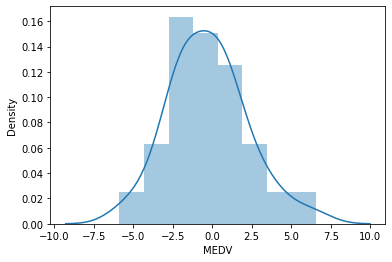

In [25]:
sns.distplot(y_test-y_xgb)

In [26]:
print(np.sqrt(mean_squared_error(y_test, y_xgb)))

2.474379165596863


In [27]:
print(xgb.score(X_test,y_test))

0.9340304583172689
